In [26]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d


np.random.seed(42)
xyz = np.random.uniform(0, 100, size=(100_000, 3))
print("Форма массива xyz:", xyz.shape)


scalar_field_const = np.full(xyz.shape[0], 10.0)
scalar_field_const *= 2
scalar_field_const += 5
print("\n[1-3] Константное поле (первые 5):", scalar_field_const[:5])

scalar_field = xyz[:, 2].copy()
print("\n→ Переход к скалярному полю Z")
print("Z (первые 5):", scalar_field[:5])

smoothed_gaussian = gaussian_filter1d(scalar_field, sigma=2)


gradient = np.gradient(scalar_field)


def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')
smoothed_moving = moving_average(scalar_field, window_size=5)


normed = (scalar_field - scalar_field.min()) / (scalar_field.max() - scalar_field.min())
colors = plt.cm.viridis(normed)[:, :3]


mean_val = scalar_field.mean()
std_val = scalar_field.std()
min_val = scalar_field.min()
max_val = scalar_field.max()
print("\n[8] Статистика: среднее={:.3f}, std={:.3f}, min={:.3f}, max={:.3f}"
      .format(mean_val, std_val, min_val, max_val))


scalar_normed = (scalar_field - min_val) / (max_val - min_val)


scalar_with_nan = scalar_field.copy()
scalar_with_nan[::1000] = np.nan
def interpolate_nan(data):
    nans = np.isnan(data)
    x = np.arange(len(data))
    f = interp1d(x[~nans], data[~nans], bounds_error=False, fill_value="extrapolate")
    return f(x)
filled_scalar = interpolate_nan(scalar_with_nan)


mask = (scalar_field >= 20) & (scalar_field <= 80)
filtered_points = xyz[mask]
print("[11] Точек после фильтрации:", filtered_points.shape[0])

xyz_modified = xyz.copy()
xyz_modified[:, 2] = scalar_field


Форма массива xyz: (100000, 3)

[1-3] Константное поле (первые 5): [25. 25. 25. 25. 25.]

→ Переход к скалярному полю Z
Z (первые 5): [73.19939418 15.59945203 60.11150117 96.99098522 18.18249672]

[8] Статистика: среднее=50.047, std=28.857, min=0.000, max=99.999
[11] Точек после фильтрации: 59932


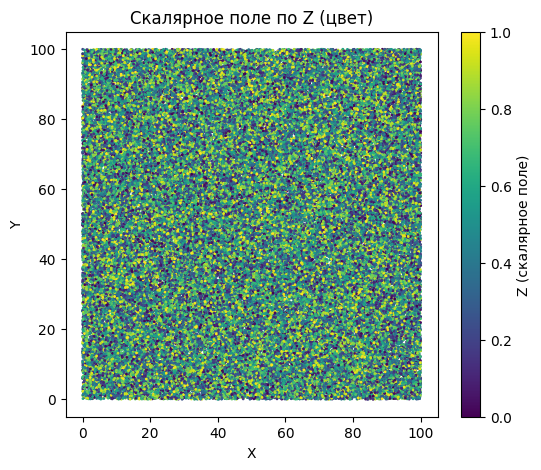

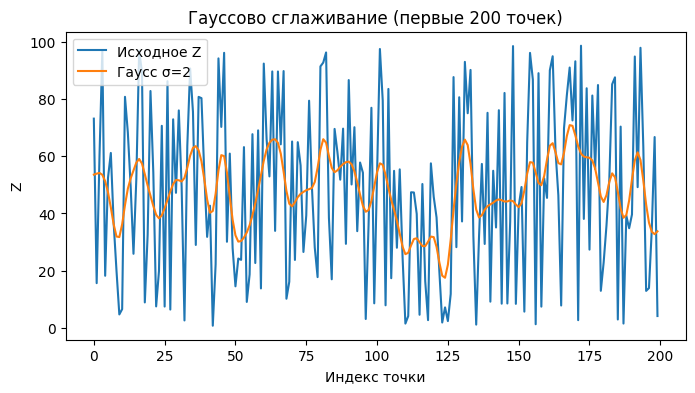

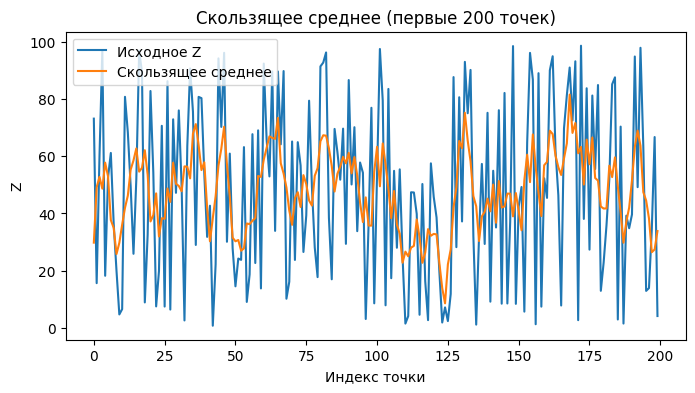

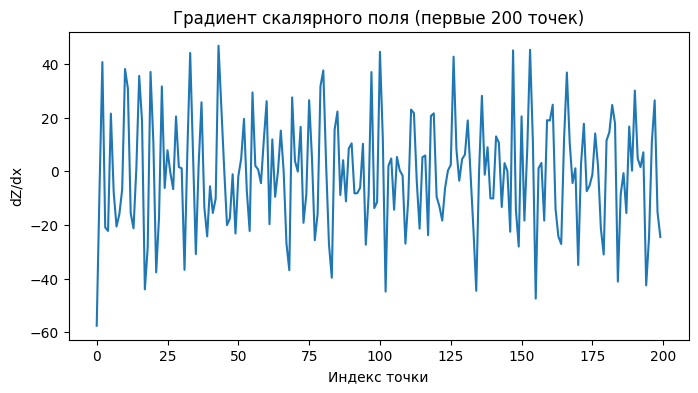

In [25]:

plt.figure(figsize=(6,5))
plt.scatter(xyz[:,0], xyz[:,1], c=colors, s=1)
plt.colorbar(label="Z (скалярное поле)")
plt.title("Скалярное поле по Z (цвет)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


plt.figure(figsize=(8,4))
plt.plot(scalar_field[:200], label='Исходное Z')
plt.plot(smoothed_gaussian[:200], label='Гаусс σ=2')
plt.legend()
plt.title("Гауссово сглаживание (первые 200 точек)")
plt.xlabel("Индекс точки")
plt.ylabel("Z")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(scalar_field[:200], label='Исходное Z')
plt.plot(smoothed_moving[:200], label='Скользящее среднее')
plt.legend()
plt.title("Скользящее среднее (первые 200 точек)")
plt.xlabel("Индекс точки")
plt.ylabel("Z")
plt.show()


plt.figure(figsize=(8,4))
plt.plot(gradient[:200])
plt.title("Градиент скалярного поля (первые 200 точек)")
plt.xlabel("Индекс точки")
plt.ylabel("dZ/dx")
plt.show()
